### Case Study of E-Commerce Website Traffic.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Loading our data:

In [2]:
df = pd.read_csv( 'ecommerce_dataset.csv', sep= ';')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### The data at a glance:

In [3]:
df.head(5)

,Timestamp,Timestamp 2,Date,Time,Hours,User ID,Cross-device user ID,Existing client,Event type,Product ID,Product Price,Product quantity,Product category,Environment,Device type,Browser family,User location
0,1460462764,12/4/16 12:06,12/04/2016,12:06:04,12,NaN,NaN,0,Basket,Unknown,11.0,1.0,Medium Items,web,Desktop,safari,Inland
1,1490572501,26/3/17 23:55,26/03/2017,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside
2,1490572501,26/3/17 23:55,26/03/2017,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside
3,1490572501,26/3/17 23:55,26/03/2017,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside
4,1490571486,26/3/17 23:38,26/03/2017,23:38:06,23,0cd8953a90d837c045c9,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,iPhone,mobile safari,Inland


In [4]:
df.shape

(400637, 17)

In [5]:
#df.info()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Modify Dataset

### Extract the Day, Month and Year values to separate columns

In [6]:
df['Day'] =df.apply(lambda row : row['Date'].split('/')[0], axis=1)
df['Month'] =df.apply(lambda row : row['Date'].split('/')[1], axis=1)
df['Year'] =df.apply(lambda row : row['Date'].split('/')[2], axis=1)

### Drop Unnecessary Columns

In [7]:
df.drop(['Timestamp','Timestamp 2','Date'], axis=1, inplace=True)

In [8]:
df.head(5)

,Time,Hours,User ID,Cross-device user ID,Existing client,Event type,Product ID,Product Price,Product quantity,Product category,Environment,Device type,Browser family,User location,Day,Month,Year
0,12:06:04,12,NaN,NaN,0,Basket,Unknown,11.0,1.0,Medium Items,web,Desktop,safari,Inland,12,04,2016
1,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside,26,03,2017
2,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside,26,03,2017
3,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside,26,03,2017
4,23:38:06,23,0cd8953a90d837c045c9,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,iPhone,mobile safari,Inland,26,03,2017


### Add and calculate a new Revenue column

### Use this formula: [IF (Event type) = Sales] THEN [Revenue  = Product Price * Product Quantity]

In [9]:
df.loc[df['Event type'] == 'Sales'  ,'Revenue'] = df['Product Price'] * df['Product quantity']

In [10]:
df.loc[df['Event type'] != 'Sales'  ,'Revenue'] = 0

In [11]:
df.head(5)

,Time,Hours,User ID,Cross-device user ID,Existing client,Event type,Product ID,Product Price,Product quantity,Product category,Environment,Device type,Browser family,User location,Day,Month,Year,Revenue
0,12:06:04,12,NaN,NaN,0,Basket,Unknown,11.0,1.0,Medium Items,web,Desktop,safari,Inland,12,04,2016,0.0
1,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside,26,03,2017,0.0
2,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside,26,03,2017,0.0
3,23:55:01,23,0c6205543f3f6a7e8082,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,Desktop,edge,Outside,26,03,2017,0.0
4,23:38:06,23,0cd8953a90d837c045c9,NaN,0,Listing,Unknown,NaN,NaN,Packages,web,iPhone,mobile safari,Inland,26,03,2017,0.0


### Reorder the columns

In [12]:
df = df[['Year', 'Month', 'Day', 'Hours', 'Time','User ID','Cross-device user ID','Existing client','Event type','Product ID'
         ,'Product Price','Product quantity','Revenue','Product category','Environment','Device type','Browser family','User location']]

In [13]:
##df=df.set_index('Year')

In [14]:
df.sample(n=5)

,Year,Month,Day,Hours,Time,User ID,Cross-device user ID,Existing client,Event type,Product ID,Product Price,Product quantity,Revenue,Product category,Environment,Device type,Browser family,User location
308669,2017,02,07,11,11:55:06,ca3629072657abcd2aad,NaN,0,Basket,6a40,9.0,1.0,0.0,Small Items,web,Desktop,chrome,Inland
341956,2016,12,11,20,20:08:15,31f6e2f094375138a017,NaN,0,Product,fafa,42.0,1.0,0.0,Packages,web,Desktop,chrome,Inland
72584,2017,01,24,20,20:07:16,50cf05185a23a8a4cf20,NaN,0,Basket,fc19,20.0,1.0,0.0,Medium Items,web,Desktop,chrome,Inland
386983,2016,08,15,7,07:56:22,104b099aff035e08ec9b,NaN,0,Product,5c3e,19.0,1.0,0.0,Small Items,web,Desktop,chrome,Inland
21824,2017,03,30,16,16:58:01,5ddf742e27dc195a61dd,NaN,1,Product,Unknown,NaN,1.0,0.0,Packages,web,Desktop,chrome,Inland


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Guided questions

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 1.  What is the evolution of the revenue during the year? Can you pinpoint and explain particular events during the year?

In [15]:
df.groupby(['Year', 'Month'])['Revenue'].sum()

Year  Month
2016  03        2517.0
      04       32468.0
      05       24201.0
      06       19504.0
      07       17552.0
      08       21973.0
      09       37240.0
      10       35935.0
      11       61382.0
      12       89680.0
2017  01       38675.0
      02       47613.0
      03       29046.0
      04       15157.0
Name: Revenue, dtype: float64

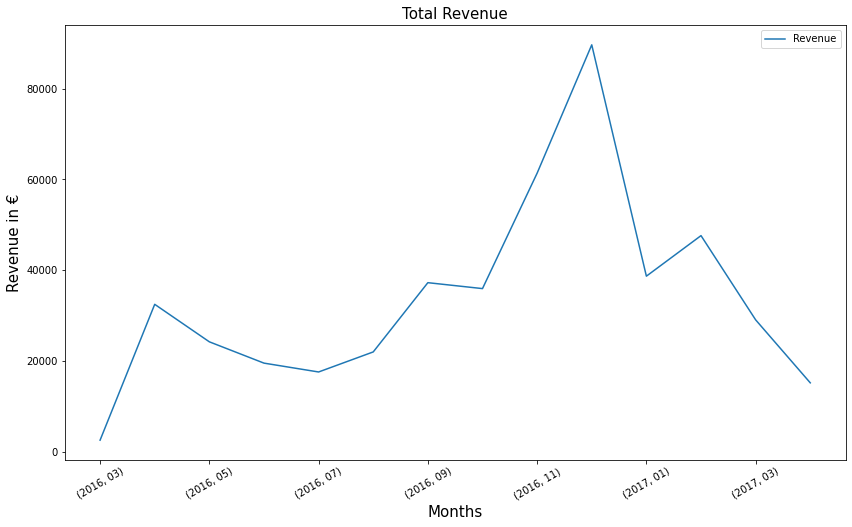

In [16]:
df.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(14,8))
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Months',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=20)
plt.title('Total Revenue',fontsize=15)
plt.legend()
plt.show()

In [17]:
dfs = df.loc[df['Event type'] == 'Sales'  ,['Year','Month','Product ID','Revenue']]

In [18]:
dfs1 = dfs.groupby(['Product ID'])['Revenue'].sum().sort_values(ascending=False)

In [19]:
dfs1.head(6)

Product ID
Unknown    100713.0
6a40        93233.0
fc19        59742.0
646e        56556.0
fafa        43577.0
9b61        29293.0
Name: Revenue, dtype: float64

In [20]:
DF6a40 = df.loc[(df['Event type'] == 'Sales') & (df['Product ID'] == '6a40') ,['Year', 'Month', 'Product ID', 'Revenue']]

In [21]:
df6a40 = DF6a40.groupby(['Year', 'Month'])['Revenue'].sum()

In [22]:
DFfc19 = df.loc[(df['Event type'] == 'Sales') & (df['Product ID'] == 'fc19') ,['Year', 'Month', 'Product ID', 'Revenue']]

In [23]:
dffc19 = DFfc19.groupby(['Year', 'Month'])['Revenue'].sum()

In [24]:
DF646e = df.loc[(df['Event type'] == 'Sales') & (df['Product ID'] == '646e') ,['Year', 'Month', 'Product ID', 'Revenue']]

In [25]:
df646e = DF646e.groupby(['Year', 'Month'])['Revenue'].sum()

In [26]:
DFfafa = df.loc[(df['Event type'] == 'Sales') & (df['Product ID'] == 'fafa') ,['Year', 'Month', 'Product ID', 'Revenue']]

In [27]:
dffafa = DFfafa.groupby(['Year', 'Month'])['Revenue'].sum()

In [28]:
DF9b61 = df.loc[(df['Event type'] == 'Sales') & (df['Product ID'] == '9b61') ,['Year', 'Month', 'Product ID', 'Revenue']]

In [29]:
df9b61 = DF9b61.groupby(['Year', 'Month'])['Revenue'].sum()

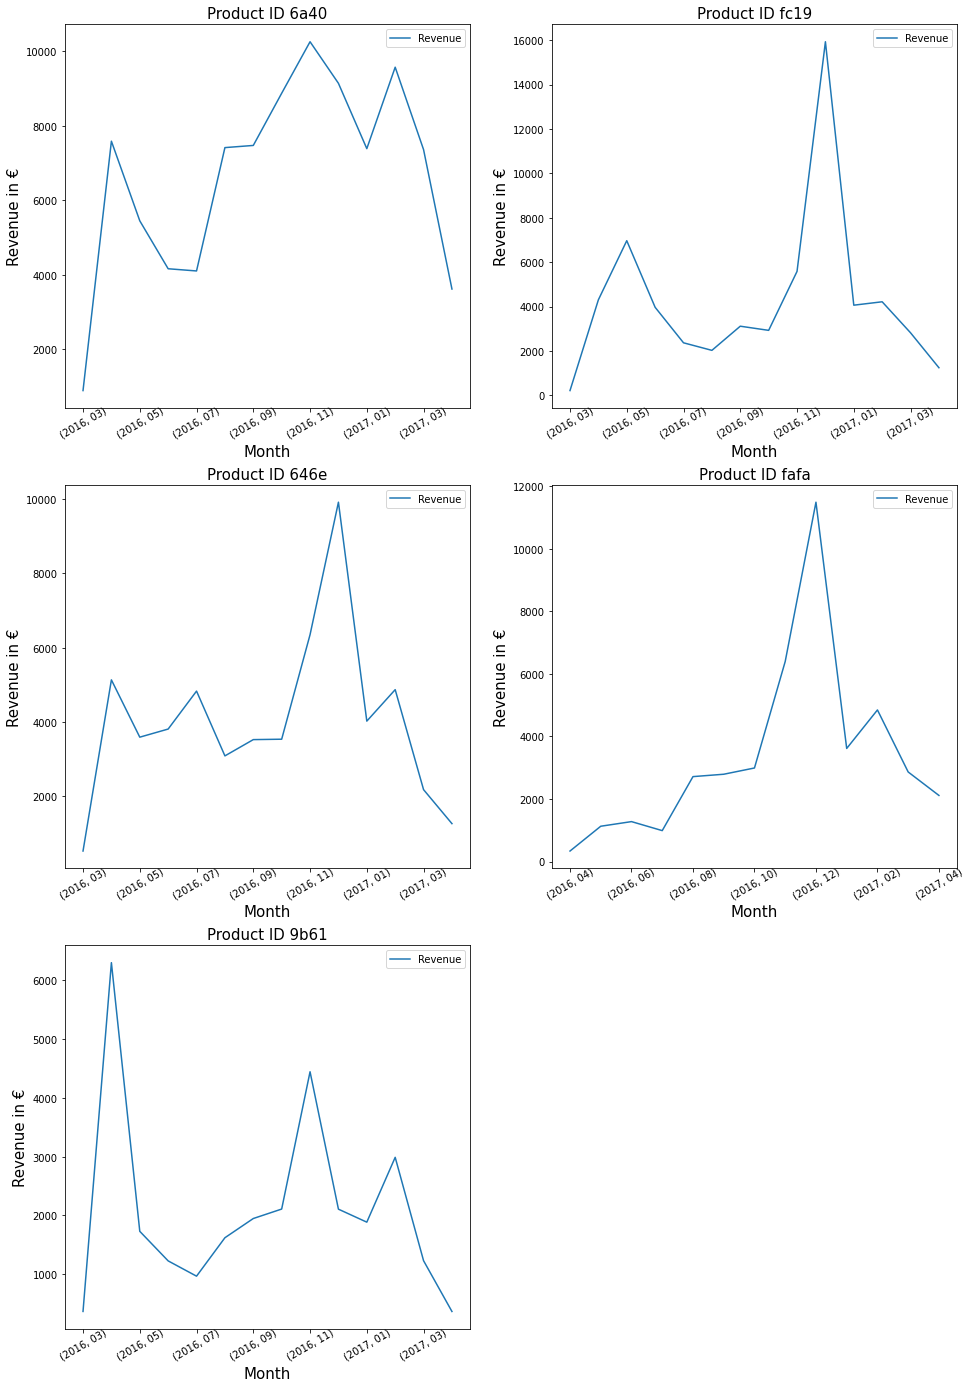

In [30]:
plt.subplot(3,2,1)
DF6a40.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,24));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Product ID 6a40',fontsize=15)
plt.legend()

plt.subplot(3,2,2)
DFfc19.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,24));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Product ID fc19',fontsize=15)
plt.legend()

plt.subplot(3,2,3)
DF646e.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,24));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Product ID 646e',fontsize=15)
plt.legend()

plt.subplot(3,2,4)
DFfafa.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,24));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Product ID fafa',fontsize=15)
plt.legend()

plt.subplot(3,2,5)
DF9b61.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,24));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=12)
plt.title('Product ID 9b61',fontsize=15)
plt.legend()


In [31]:
##df['Event type'].value_counts()

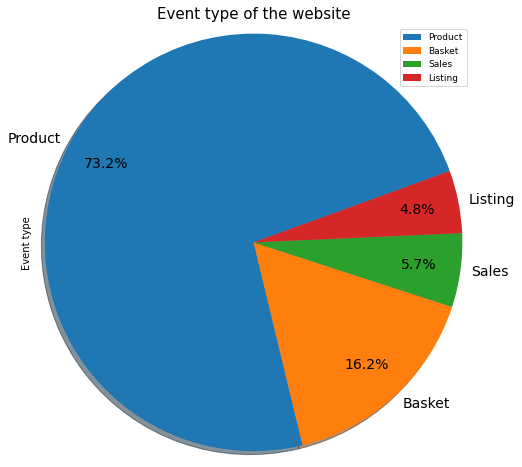

In [32]:
df['Event type'].value_counts().plot(kind='pie',figsize=(8,8),radius=1.2,startangle=20,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Event type of the website',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

In [33]:
dfsales = df.loc[(df['Event type'] == 'Sales') ,['Year', 'Month', 'Event type']]

In [34]:
DFsales = dfsales.groupby(['Year','Month']).count()

In [35]:
dfBasket = df.loc[(df['Event type'] == 'Basket') ,['Year', 'Month', 'Event type']]

In [36]:
DFBasket = dfBasket.groupby(['Year','Month']).count()

In [37]:
dfProduct = df.loc[(df['Event type'] == 'Product') ,['Year', 'Month', 'Event type']]

In [38]:
DFProduct = dfProduct.groupby(['Year','Month']).count()

In [39]:
dfListing = df.loc[(df['Event type'] == 'Listing') ,['Year', 'Month', 'Event type']]

In [40]:
DFListing = dfListing.groupby(['Year','Month']).count()

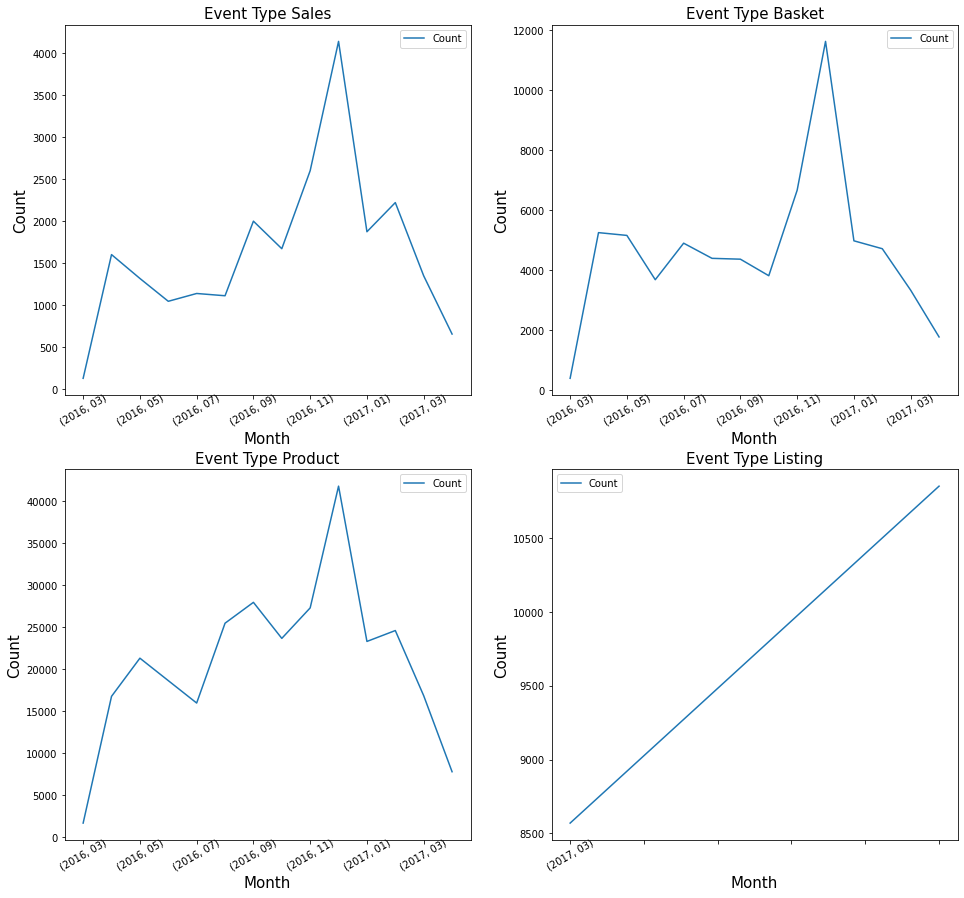

In [41]:
plt.subplot(2,2,1)
dfsales.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(15,15));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Event Type Sales',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,2)
dfBasket.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(15,15));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Event Type Basket',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,3)
dfProduct.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,15));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Event Type Product',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,4)
dfListing.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,15));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Event Type Listing',fontsize=15)
plt.legend(['Count'])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Treat the Unknown device type as an Android device type.

In [42]:
df.groupby(['Device type'])['Environment'].value_counts()

Device type           Environment
Android - Smartphone  web             13875
Android - Tablet      web              5340
Desktop               web            297419
Mobile - Other        web              4773
Unknown               app_android     41319
iPad                  web             12768
iPhone                web             25143
Name: Environment, dtype: int64

In [43]:
df.loc[df['Environment'] == 'app_android','Device type'].value_counts()

Unknown    41319
Name: Device type, dtype: int64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 2- Over the year, what devices have shoppers used to browse this merchant's site? Explain the main changes.

In [44]:
df['Device type'].value_counts()

Desktop                 297419
Unknown                  41319
iPhone                   25143
Android - Smartphone     13875
iPad                     12768
Android - Tablet          5340
Mobile - Other            4773
Name: Device type, dtype: int64

In [45]:
dfDesktop = df.loc[(df['Device type'] == 'Desktop') ,['Year', 'Month', 'Device type']]

In [46]:
DFDesktop = dfDesktop.groupby(['Year','Month'])['Year'].count()

In [47]:
dfMobile = df.loc[(df['Device type'] != 'Desktop') ,['Year', 'Month', 'Device type']]

In [48]:
DFMobile = dfMobile.groupby(['Year','Month'])['Year'].count()

In [49]:
sd = df.loc[(df['Event type'] == 'Sales') & (df['Device type'] == 'Desktop') ,['Year', 'Month', 'Device type', 'Revenue']]

In [50]:
SD = sd.groupby(['Year', 'Month'])['Revenue'].sum()

In [51]:
sm = df.loc[(df['Event type'] == 'Sales') & (df['Device type'] != 'Desktop') ,['Year', 'Month', 'Device type', 'Revenue']]

In [52]:
SM = sm.groupby(['Year', 'Month'])['Revenue'].sum()

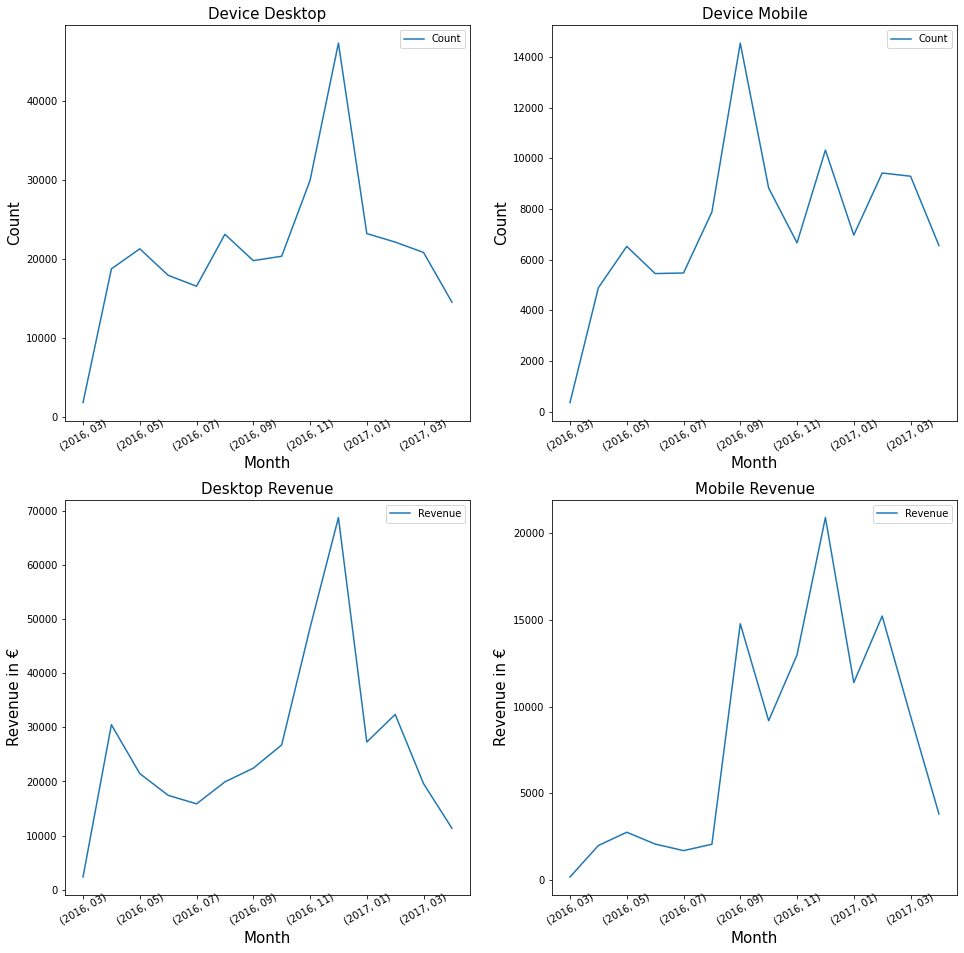

In [53]:
plt.subplot(2,2,1)
dfDesktop.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,16));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Device Desktop',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,2)
dfMobile.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,16));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Device Mobile',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,3)
sd.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,16));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Desktop Revenue',fontsize=15)
plt.legend()

plt.subplot(2,2,4)
sm.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,16));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Mobile Revenue',fontsize=15)
plt.legend()

In [54]:
dfAndroid= df.loc[(df['Device type'] == 'Android - Smartphone') | (df['Device type'] == 'Unknown') | (df['Device type'] == 'Android - Tablet')
                  ,['Year', 'Month', 'Device type']]

In [55]:
DFAndroid = dfAndroid.groupby(['Year','Month'])['Year'].count()

In [56]:
dfApple= df.loc[(df['Device type'] == 'iPhone') | (df['Device type'] == 'iPad') ,['Year', 'Month', 'Device type']]

In [57]:
DFApple = dfApple.groupby(['Year','Month'])['Year'].count()

In [58]:
RevenueAndroid = df.loc[(df['Event type'] == 'Sales') & ((df['Device type'] == 'Android - Smartphone') | (df['Device type'] == 'Unknown') | (df['Device type'] == 'Android - Tablet'))
                        ,['Year', 'Month', 'Revenue', 'Event type', 'Device type']]

In [59]:
RA = RevenueAndroid.groupby(['Year', 'Month'])['Revenue'].sum()

In [60]:
RA.sum()

91982.0

In [61]:
RevenueApple = df.loc[(df['Event type'] == 'Sales') & ((df['Device type'] == 'iPhone') | (df['Device type'] == 'iPad'))
                        ,['Year', 'Month', 'Revenue', 'Event type', 'Device type']]

In [62]:
RAP = RevenueApple.groupby(['Year', 'Month'])['Revenue'].sum()

In [63]:
RAP.sum()

15393.0

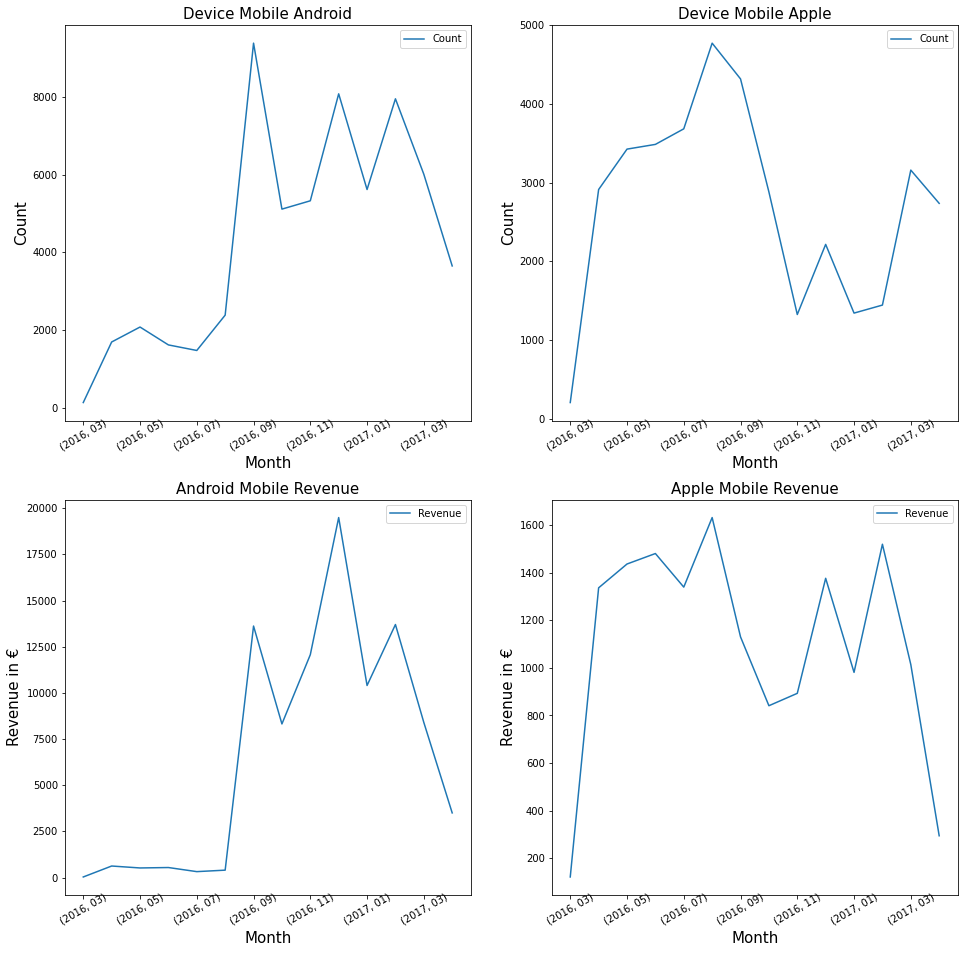

In [64]:
plt.subplot(2,2,1)
dfAndroid.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,16));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Device Mobile Android',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,2)
dfApple.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,16));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Device Mobile Apple',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,3)
RevenueAndroid.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,16));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Android Mobile Revenue',fontsize=15)
plt.legend()

plt.subplot(2,2,4)
RevenueApple.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,16));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Apple Mobile Revenue',fontsize=15)
plt.legend()

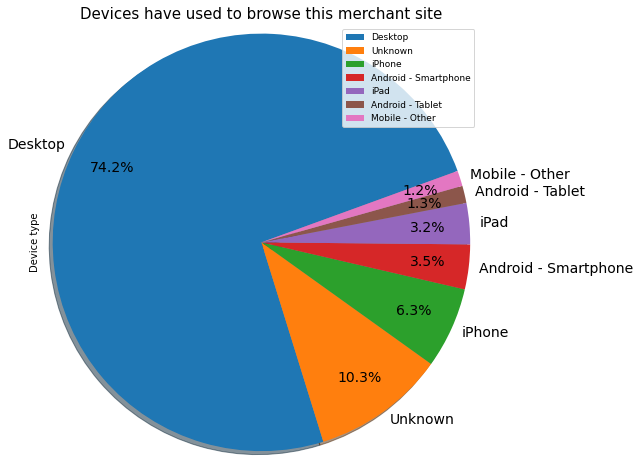

In [65]:
df['Device type'].value_counts().plot(kind='pie',figsize=(8,8),radius=1.2,startangle=20,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Devices have used to browse this merchant site',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 3. In your opinion, do Applications perform better than Mobile Web browsing?

In [66]:
df['Environment'].value_counts()

web            359318
app_android     41319
Name: Environment, dtype: int64

In [67]:
dfMobileWeb = df.loc[(df['Device type'] != 'Desktop') & (df['Environment'] == 'web') ,['Year', 'Month', 'Device type','Environment']]

In [68]:
DFMobileWeb = dfMobileWeb.groupby(['Year','Month'])['Year'].count()

In [69]:
dfapp_android = df.loc[(df['Environment'] == 'app_android') ,['Year', 'Month', 'Device type','Environment']]

In [70]:
DFapp_android = dfapp_android.groupby(['Year','Month'])['Year'].count()

In [71]:
RevenueMobileWeb = df.loc[(df['Event type'] == 'Sales') & (df['Device type'] != 'Desktop') & (df['Environment'] == 'web') ,['Year', 'Month','Revenue', 'Event type', 'Device type','Environment']]

In [72]:
DFRevenueMobileWeb = RevenueMobileWeb.groupby(['Year', 'Month'])['Revenue'].sum()

In [73]:
DFRevenueMobileWeb.sum()

23201.0

In [74]:
RevenueApp_android = df.loc[(df['Event type'] == 'Sales') & (df['Environment'] == 'app_android') ,['Year', 'Month','Revenue', 'Event type', 'Device type','Environment']]

In [75]:
DFRevenueApp_android = RevenueApp_android.groupby(['Year', 'Month'])['Revenue'].sum()

In [76]:
DFRevenueApp_android.sum()

85164.0

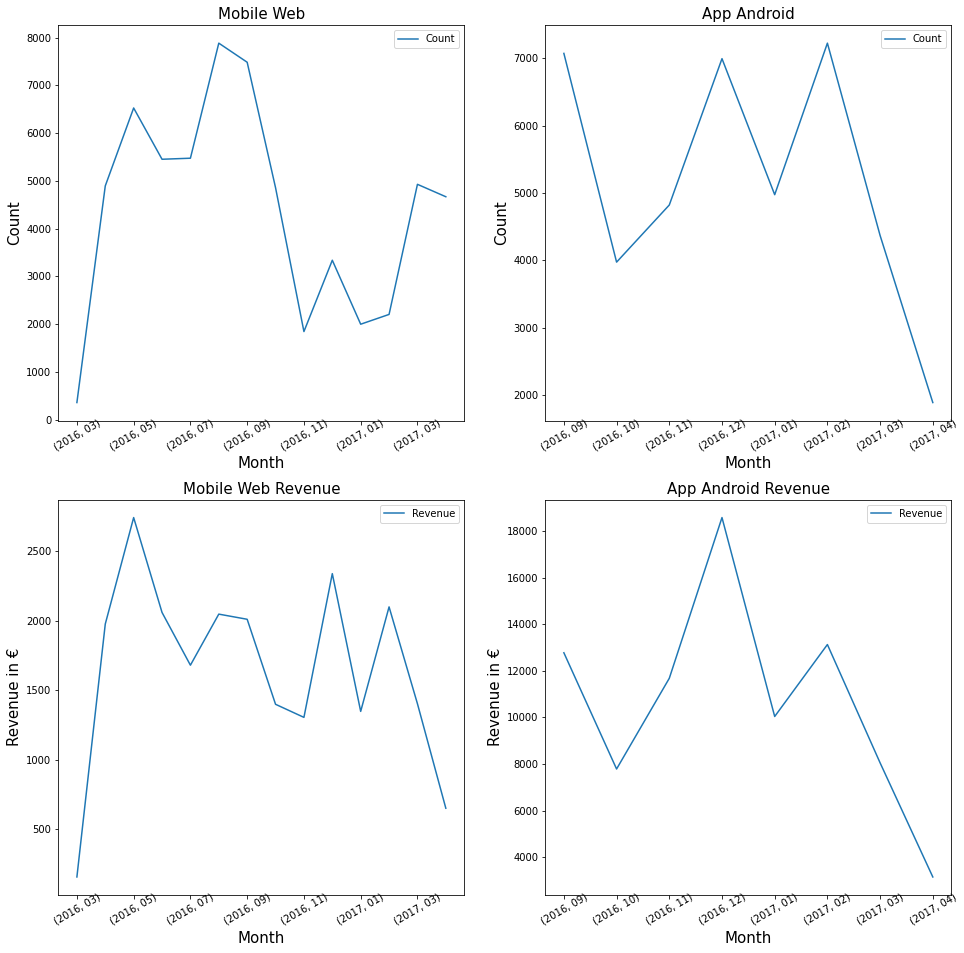

In [77]:
plt.subplot(2,2,1)
dfMobileWeb.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,16));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Mobile Web',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,2)
dfapp_android.groupby(['Year','Month'])['Year'].count().plot(kind='line', figsize=(16,16));
plt.ylabel('Count',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('App Android',fontsize=15)
plt.legend(['Count'])

plt.subplot(2,2,3)
RevenueMobileWeb.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,16));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('Mobile Web Revenue',fontsize=15)
plt.legend()

plt.subplot(2,2,4)
RevenueApp_android.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(16,16));
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=30, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=11)
plt.title('App Android Revenue',fontsize=15)
plt.legend()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 1. The best device based on the revenue.

In [78]:
dfff = df.loc[(df['Event type'] == 'Sales'),['Device type','Revenue']]

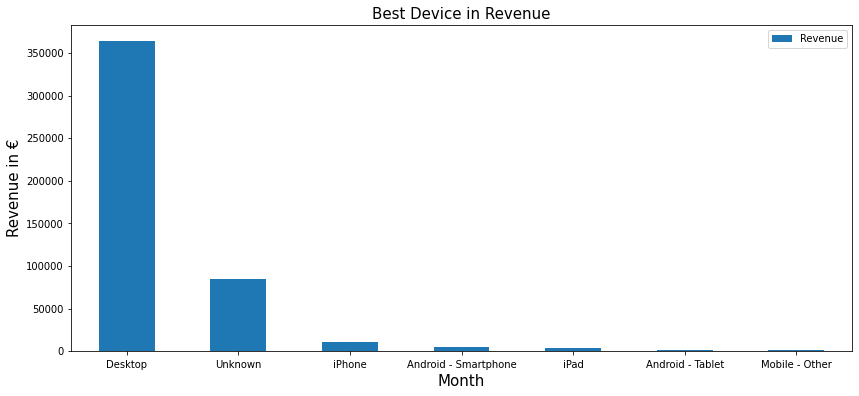

In [79]:
ax = dfff.groupby(['Device type'])['Revenue'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Best Device in Revenue',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 2. Do new customers perform better than customers who have already done a purchase in the past?

In [80]:
dfec1 = df.loc[(df['Event type'] == 'Sales') & (df['Existing client'] == 1) ,['Year', 'Month','Existing client', 'Revenue']]

In [81]:
DFEC1 = dfec1.groupby(['Year', 'Month'])['Revenue'].sum()

In [82]:
DFEC1.sum()

115416.0

In [83]:
dfec0 = df.loc[(df['Event type'] == 'Sales') & (df['Existing client'] == 0) ,['Year', 'Month','Existing client', 'Revenue']]

In [84]:
DFEC0 = dfec0.groupby(['Year', 'Month'])['Revenue'].sum()

In [85]:
DFEC0.sum()

357527.0

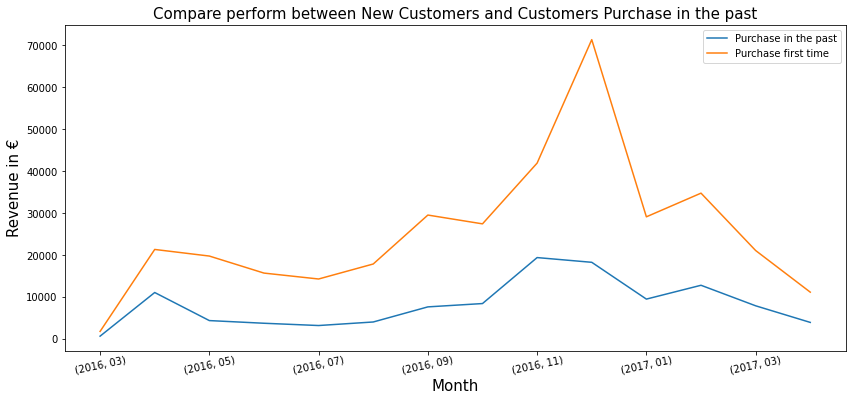

In [86]:
dfec1.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(14,6))
dfec0.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(14,6))
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=12, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Compare perform between New Customers and Customers Purchase in the past',fontsize=15)
plt.legend(['Purchase in the past','Purchase first time'])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 3. Best hours based on the revenue

In [87]:
dfh = df.loc[(df['Event type'] == 'Sales')  ,['Hours', 'Revenue']]

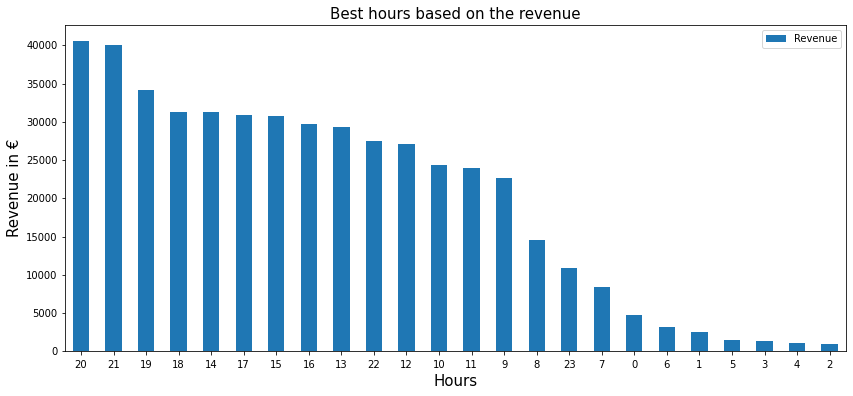

In [88]:
dfh.groupby(['Hours'])['Revenue'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Hours',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Best hours based on the revenue',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 4. Best product category based on the revenue

In [89]:
dfpc = df.loc[(df['Event type'] == 'Sales')  ,['Product category', 'Revenue']]

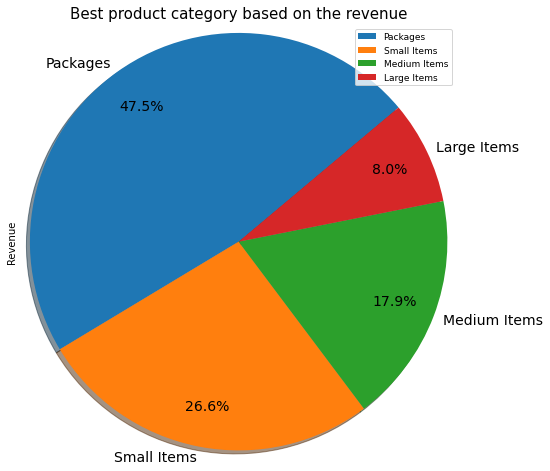

In [90]:
dfpc.groupby(['Product category'])['Revenue'].sum().sort_values(ascending=False).plot(kind='pie',figsize=(8,8),radius=1.2,startangle=40,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Best product category based on the revenue',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 5. The best 10 browsers based on the highest revenue

In [91]:
dfbf = df.loc[(df['Event type'] == 'Sales')  ,['Browser family', 'Revenue']]

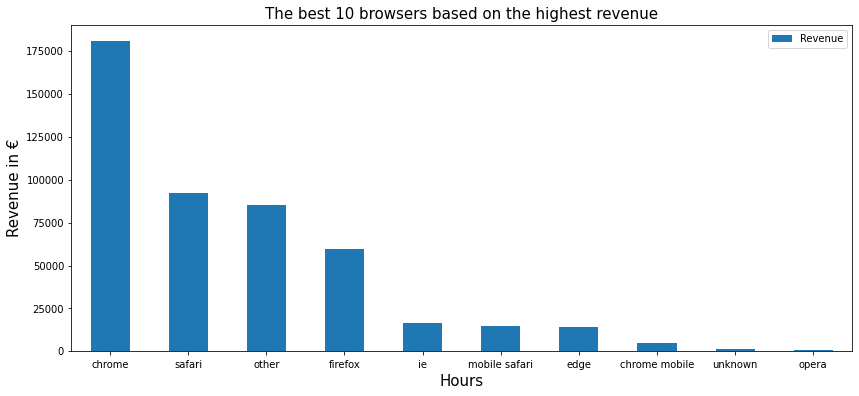

In [92]:
dfbf.groupby(['Browser family'])['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(14,6))
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Hours',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('The best 10 browsers based on the highest revenue',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 6. Best user location based on the revenue

In [93]:
dful = df.loc[(df['Event type'] == 'Sales')  ,['User location', 'Revenue']]

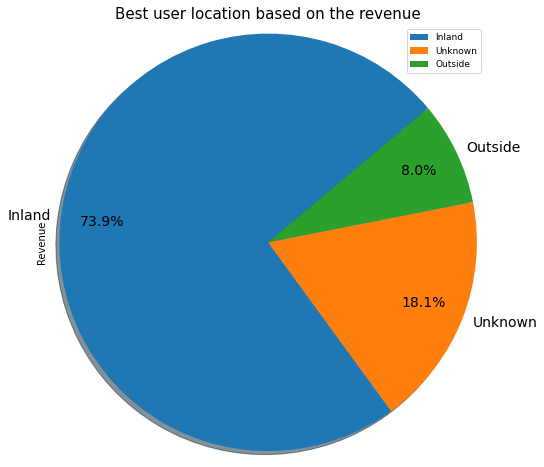

In [94]:
dful.groupby(['User location'])['Revenue'].sum().sort_values(ascending=False).plot(kind='pie',figsize=(8,8),radius=1.2,startangle=40,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Best user location based on the revenue',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

### A. Compare between Inland and outside revenue

In [95]:
DFULL = df.loc[(df['Event type'] == 'Sales') & (df['User location'] == 'Inland') ,['Year', 'Month','User location', 'Revenue']]

In [96]:
dfDF = DFULL.groupby(['Year', 'Month'])['Revenue'].sum()

In [97]:
DFULO = df.loc[(df['Event type'] == 'Sales') & (df['User location'] == 'Outside') ,['Year', 'Month','User location', 'Revenue']]

In [98]:
dfulo = DFULO.groupby(['Year', 'Month'])['Revenue'].sum()

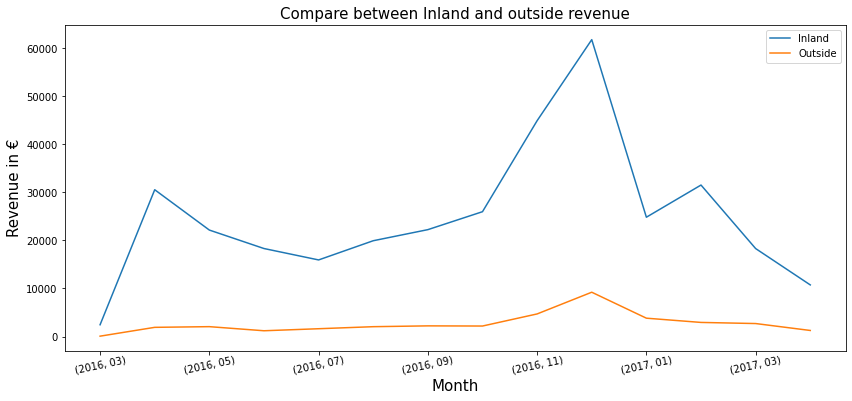

In [99]:
DFULL.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(14,6))
DFULO.groupby(['Year', 'Month'])['Revenue'].sum().plot(kind='line', figsize=(14,6))
plt.ylabel('Revenue in €',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=12, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Compare between Inland and outside revenue',fontsize=15)
plt.legend(['Inland','Outside'])
plt.show()